In [1]:
"""Some important Ptolemaic metric spaces are 4-embeddable into R^3.
Connor mentions a tetrahedron lower bound: When all but one distances
between four points are known, the last one can be lower bounded as the
shortest side of a tetrahedron. This would be a degenerate tetrahedron,
with the two known triangles sharing one side and lying in the same plane.
"""

'Some important Ptolemaic metric spaces are 4-embeddable into R^3.\nConnor mentions a tetrahedron lower bound: When all but one distances\nbetween four points are known, the last one can be lower bounded as the\nshortest side of a tetrahedron. This would be a degenerate tetrahedron,\nwith the two known triangles sharing one side and lying in the same plane.\n'

In [48]:
import numpy as np
from sympy import *
#from algebra_with_sympy import *

init_printing(use_latex='mathjax')

dist_prop = dict(real=True, positive=True)
# generic symbols
A, s, a, b, c, h = symbols("A s a b c h", **dist_prop)

# Heron
semiperimeter = {s: (a + b + c) / 2}
area = sqrt(s * (s - a) * (s - b) * (s - c))

height_over_a = 2 / a * area.subs(semiperimeter)

area, semiperimeter

⎛     ____________________________  ⎧   a   b   c⎫⎞
⎜√s⋅╲╱ (-a + s)⋅(-b + s)⋅(-c + s) , ⎨s: ─ + ─ + ─⎬⎟
⎝                                   ⎩   2   2   2⎭⎠

![](img.png)

In [49]:
# we have two pivots, a query (center) and an object
# we want to lower bound d(q,o)
# we know all other distances

# the two resulting triangles have a shared base p0-p1 of length p
p = symbols("p", **dist_prop)

# the query triangle has these other sides:
q_0, q_1 = symbols("q:2", **dist_prop)

# dito for the object triangle
o_0, o_1 = symbols("o:2", **dist_prop)

# these triangles have heights that we can infer via Heron
h_q = height_over_a.subs({
    a: p, b: q_0, c: q_1
})
h_o = height_over_a.subs({
    a: p, b: o_0, c: o_1
})

# the height "bisects" the shared base at these lengths:
m_q0 = sqrt(q_0**2 - h_q**2)
m_o0 = sqrt(o_0**2 - h_o**2)

m_q1 = sqrt(q_1**2 - h_q**2)
m_o1 = sqrt(o_1**2 - h_o**2)

m_q0, m_o0

⎛       ___________________________________________________________________   
⎜      ╱         ⎛  p   q₀   q₁⎞ ⎛p   q₀   q₁⎞ ⎛p   q₀   q₁⎞ ⎛p   q₀   q₁⎞    
⎜     ╱        4⋅⎜- ─ + ── + ──⎟⋅⎜─ - ── + ──⎟⋅⎜─ + ── - ──⎟⋅⎜─ + ── + ──⎟    
⎜    ╱     2     ⎝  2   2    2 ⎠ ⎝2   2    2 ⎠ ⎝2   2    2 ⎠ ⎝2   2    2 ⎠    
⎜   ╱    q₀  - ─────────────────────────────────────────────────────────── ,  
⎜  ╱                                         2                                
⎝╲╱                                         p                                ╲

      ___________________________________________________________________⎞
     ╱         ⎛  o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎟
    ╱        4⋅⎜- ── + ── + ─⎟⋅⎜── - ── + ─⎟⋅⎜── + ── - ─⎟⋅⎜── + ── + ─⎟ ⎟
   ╱     2     ⎝  2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠ ⎟
  ╱    o₀  - ─────────────────────────────────────────────────────────── ⎟
 ╱                                         2                           

In [34]:
# We know the height of the triangle w.r.t. q.
# Let's figure out the "width" or the "x-position" of the point q.

# Let q_0 be on the left and q_1 be on the right.
# If the triangle is acute:
m_ac = m_q0

# If the triangle is obtuse, we have two cases:
# One where the point is to the left:
m_ob_left = -m_q0
# And one where the point is to the right:
m_ob_right = m_q0 # which is identical to m_ac

# left obtuse means that q_1 has to be the longest side and
# that q_1**2 > p**2 + q_1**2
m_q = Piecewise(
    (m_ob_left,  q_1**2 > p**2 + q_0**2), # And(And(q_1 > p, q_1 > q_0) ,
    (m_ac, True)
)

m_o = m_q.subs({m_q0:m_o0, q_0:o_0, q_1:o_1})
m_o

⎧        ___________________________________________________________________  
⎪       ╱         ⎛  o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞   
⎪      ╱        4⋅⎜- ── + ── + ─⎟⋅⎜── - ── + ─⎟⋅⎜── + ── - ─⎟⋅⎜── + ── + ─⎟   
⎪     ╱     2     ⎝  2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠   
⎪-   ╱    o₀  - ───────────────────────────────────────────────────────────   
⎪   ╱                                         2                               
⎪ ╲╱                                         p                                
⎨                                                                             
⎪       ___________________________________________________________________   
⎪      ╱         ⎛  o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞    
⎪     ╱        4⋅⎜- ── + ── + ─⎟⋅⎜── - ── + ─⎟⋅⎜── + ── - ─⎟⋅⎜── + ── + ─⎟    
⎪    ╱     2     ⎝  2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠    
⎪   ╱    o₀  - ─────────────────────────────────────

In [50]:
# construct the right triangle which hypotenuse of length d connects q and o
# from h and m s

# we know that one of these two should be the actual distance
dist = (h_q - h_o) ** 2 + (m_q - m_o) ** 2 # = d**2
dist = sqrt(dist)
simplify(dist)

⎧     ________________________________________________________________________
⎪    ╱                                                                        
⎪   ╱                                                                         
⎪  ╱   ⎛  ____________________________________________   _____________     ___
⎪╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                                                             
⎪                                                                             
⎪     ________________________________________________________________________
⎪    ╱                                                                        
⎪   ╱                                                                         
⎨  ╱   ⎛  ____________________________________________   _____________     ___
⎪╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p

In [37]:
# we can also find an upper bound this way:
# arrange the triangles so that one height is positive and one is negative:
dist_ub = (h_q + h_o)**2 + (m_q - m_o)**2
dist_ub = sqrt(dist_ub)
dist_ub

                 _____________________________________________________________
                ╱                                                             
               ╱                                                              
              ╱                                                               
             ╱                                                                
            ╱     ⎛      _____________________________________________     ___
           ╱      ⎜     ╱ ⎛  o₀   o₁   p⎞ ⎛o₀   o₁   p⎞ ⎛o₀   o₁   p⎞     ╱ o₀
          ╱       ⎜2⋅  ╱  ⎜- ── + ── + ─⎟⋅⎜── - ── + ─⎟⋅⎜── + ── - ─⎟ ⋅  ╱  ──
         ╱        ⎜  ╲╱   ⎝  2    2    2⎠ ⎝2    2    2⎠ ⎝2    2    2⎠  ╲╱   2 
        ╱         ⎜───────────────────────────────────────────────────────────
       ╱          ⎝                                  p                        
      ╱                                                                       
     ╱                                              

In [38]:

# geometrically, we know that
# m_q0 + m_o0 == m_o1 + m_q1


In [39]:
# test with a simple triangle:
tri0 = {
    p:3,
    q_0:7,
    q_1:5,
}
tri1 = {
    p:tri0[p],
    o_0:10.77,
    o_1:12.21,
}

height0 = 4.33
m_base0 = 5.5
precision = 0.02

assert N(abs(h_q.subs(tri0) - height0)) < precision, "wrong height!"
assert N(abs(m_q0.subs(tri0) - m_base0)) < precision, "wrong intersect!"

dist_n = float(dist.subs(tri0).subs(tri1))
assert np.allclose(dist_n, 11.06, atol=precision), dist_n

In [40]:
# test with a "hard" triangle
trih = {
    p:32.44996148,
    q_0:65.76473219,
    q_1:38.83297568,
    o_0:64.5368112 ,
    o_1:36.22154055,
}

assert np.abs(h_q.subs(trih) - 27.74) < precision
assert np.abs(h_o.subs(trih) - 23.3) < precision
m_q0.subs(trih) - 32.45, m_o0.subs(trih) - 32.45

assert np.allclose(float(dist.subs(trih)), 4.47, atol=precision)

In [41]:
# from Connor's paper:
# 1/d(p0,p1) * (d(q, p0)**2 + d(q, p0)**2) > 2*t
# is a lower bound
lb = 1/2/p * (q_0**2 + q_1**2)
N(lb.subs(tri0)), N(dist_n)

(12.3333333333333, 11.0730938046379)

In [42]:
simplify(dist < lb)

                  ⎧     ______________________________________________________
                  ⎪    ╱                                                      
                  ⎪   ╱                                                       
                  ⎪  ╱   ⎛  ____________________________________________   ___
                  ⎪╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀
                  ⎪───────────────────────────────────────────────────────────
                  ⎪                                                           
                  ⎪                                                           
                  ⎪     ______________________________________________________
    ⎛  2     2⎞   ⎪    ╱                                                      
0.5⋅⎝q₀  + q₁ ⎠   ⎪   ╱                                                       
─────────────── > ⎨  ╱   ⎛  ____________________________________________   ___
       p          ⎪╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁

In [44]:
connor_diff = lambdify([p,q_0, q_1, o_0, o_1], lb - dist, "numpy")
tetrahedron_lb = lambdify([p,q_0, q_1, o_0, o_1], dist, "numpy")
tetrahedron_ub = lambdify([p,q_0, q_1, o_0, o_1], dist_ub, "numpy")
connor_lb = lambdify([p,q_0, q_1, o_0, o_1], lb, "numpy")

def ptolemy_lb(p, q_0, q_1, o_0, o_1):
    diff = np.abs(q_0 * o_1 - q_1 * o_0)
    return diff / p

In [45]:
from tqdm import tqdm

def _stable_tetrahedron_lb(p_n, q_0_n, q_1_n, o_0_n, o_1_n):
    for i in tqdm(range(len(p_n))):
        yield dist.subs({
            p:p_n[i],
            q_0:q_0_n[i],
            q_1:q_1_n[i],
            o_0:o_0_n[i],
            o_1:o_1_n[i],
        }).evalf()

def stable_tetrahedron_lb(p_n, q_0_n, q_1_n, o_0_n, o_1_n):
    return np.asarray(list(_stable_tetrahedron_lb(p_n, q_0_n, q_1_n, o_0_n, o_1_n)), dtype=float)

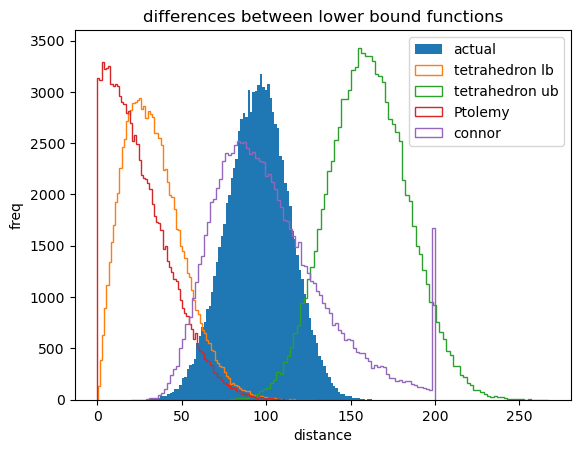

In [67]:
# simulate triangles
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

dist_func = lambda x,y:np.linalg.norm(x-y, axis=-1)
n_samples= 100000
dim = 10
points = rng.integers(-37,38, size=[n_samples, 4, dim])
p0,p1,q,o = 0,1,2,3
dists_p = dist_func(points[:,p0,:], points[:,p1,:])
dists_q0 = dist_func(points[:,p0,:], points[:,q,:])
dists_q1 = dist_func(points[:,p1,:], points[:,q,:])
dists_o0 = dist_func(points[:,p0,:], points[:,o,:])
dists_o1 = dist_func(points[:,p1,:], points[:,o,:])
dists_target = dist_func(points[:,q,:], points[:,o,:])

args = np.vstack((dists_p, dists_q0, dists_q1, dists_o0, dists_o1))
tet_lb = tetrahedron_lb(*args)
tet_ub = tetrahedron_ub(*args)
pto_n = ptolemy_lb(*args)
connors_lb_n = connor_lb(*args)
connors_lb_n = np.clip(connors_lb_n, -10, 200)

bins = 100
plt.hist(dists_target,  bins=bins, label="actual")
plt.hist(tet_lb, bins=bins, histtype="step", label="tetrahedron lb")
plt.hist(tet_ub, bins=bins, histtype="step", label="tetrahedron ub")
plt.hist(pto_n, bins=bins, histtype="step", label="Ptolemy")
plt.hist(connors_lb_n, bins=bins, histtype="step", label="connor")

plt.title("differences between lower bound functions")
plt.xlabel("distance")
plt.ylabel("freq")
plt.legend()
plt.show()

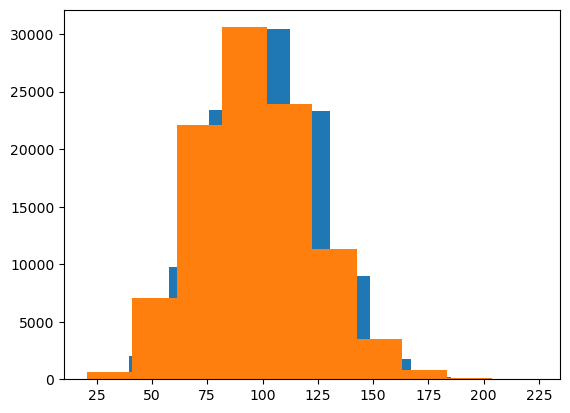

In [61]:
plt.hist(dists_target - tet_lb);
plt.hist(tet_ub - dists_target);

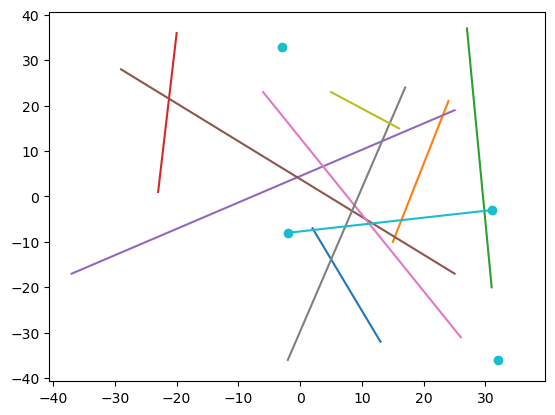

In [65]:
problems = np.abs(dists_target - my_lb_n) > 0.01
ppoints = points[problems,:,:]

plt.plot(*ppoints[0][:2].T)
for p in ppoints[0]:
    plt.plot(*p, "o")
    
plt.show()